# WeatherPy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
lat_lng_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0],lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())
        lat_lng_list.append(lat_lng)

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

750
750


In [3]:
#Create dataframe with list of cities
city_weather = pd.DataFrame(cities)
city_weather = city_weather.rename(columns={0: 'city'})

#Add lat and lngs to dataframe, create separate columns for lats and longs
city_weather['countries'] = countries
city_weather['lat_lngs'] = lat_lng_list
city_weather['lat'] = city_weather.lat_lngs.map(lambda x: str(x[0]))
city_weather['long'] = city_weather.lat_lngs.map(lambda x: str(x[1]))

city_weather.head()

,city,countries,lat_lngs,lat,long
0,mataura,PF,"(-84.15719227970935, -158.1656918138079)",-84.15719227970935,-158.1656918138079
1,heihe,CN,"(50.59119042704734, 126.85828702042306)",50.59119042704734,126.85828702042306
2,port elizabeth,ZA,"(-89.15485981491796, 34.65092290242765)",-89.15485981491796,34.65092290242765
3,micheweni,TZ,"(-5.2445735160357, 41.75967388380866)",-5.2445735160357,41.75967388380866
4,houma,US,"(28.03013570577255, -90.47056875082696)",28.03013570577255,-90.47056875082696


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create new columns for data we'll be collecting from the API
city_weather['temp'] = ""
city_weather['max_temp'] = ""
city_weather['humidity'] = ""
city_weather['wind_speed'] = ""
city_weather['clouds'] = ""
#Iterate over each row
for index, row in city_weather.iterrows():
    city = row['city']
    print(f"Processing Record {index + 1} | {city}")
    city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + api_key
    #print(url)
    weather = requests.get(url).json()
    try:
        city_weather.loc[index, 'temp'] = weather['main']['temp']
        city_weather.loc[index, 'max_temp'] = weather['main']['temp_max']
        city_weather.loc[index, 'humidity'] = weather['main']['humidity']
        city_weather.loc[index, 'wind_speed'] = weather['wind']['speed']
        city_weather.loc[index, 'clouds'] = weather['clouds']['all']
    except(KeyError,IndexError):
        city_weather.loc[index, 'temp'] = 'city not found'
        city_weather.loc[index, 'humidity'] = 'city not found'
        city_weather.loc[index, 'wind_speed'] = 'city not found'
        city_weather.loc[index, 'clouds'] = 'city not found'
    time.sleep(.50)
    
print("----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 | mataura
Processing Record 2 | heihe
Processing Record 3 | port elizabeth
Processing Record 4 | micheweni
Processing Record 5 | houma
Processing Record 6 | ushuaia
Processing Record 7 | kyaikto
Processing Record 8 | vila franca do campo
Processing Record 9 | sorong
Processing Record 10 | agirish
Processing Record 11 | klaksvik
Processing Record 12 | cape town
Processing Record 13 | kodiak
Processing Record 14 | rikitea
Processing Record 15 | krasnogvardeyets
Processing Record 16 | marawi
Processing Record 17 | punta arenas
Processing Record 18 | atuona
Processing Record 19 | kontagora
Processing Record 20 | hithadhoo
Processing Record 21 | lebu
Processing Record 22 | sargatskoye
Processing Record 23 | faanui
Processing Record 24 | saint-philippe
Processing Record 25 | belushya guba
Processing Record 26 | zhigansk
Processing Record 27 | illoqqortoormiut
Processing Record 28 | hobart
Processing Record 29 | taolanaro
Processing Record 30 | bumba
Processing Record 31 |

Processing Record 249 | yerbogachen
Processing Record 250 | castro
Processing Record 251 | muros
Processing Record 252 | isangel
Processing Record 253 | rawson
Processing Record 254 | attawapiskat
Processing Record 255 | fortuna foothills
Processing Record 256 | maceio
Processing Record 257 | cabinda
Processing Record 258 | san ignacio
Processing Record 259 | torbay
Processing Record 260 | lorengau
Processing Record 261 | annau
Processing Record 262 | ardakan
Processing Record 263 | cam pha
Processing Record 264 | ordzhonikidze
Processing Record 265 | bowen
Processing Record 266 | brokopondo
Processing Record 267 | hamza
Processing Record 268 | arlit
Processing Record 269 | fortuna
Processing Record 270 | addis abeba
Processing Record 271 | koluszki
Processing Record 272 | ambovombe
Processing Record 273 | joetsu
Processing Record 274 | chagda
Processing Record 275 | dawei
Processing Record 276 | mar del plata
Processing Record 277 | sahbuz
Processing Record 278 | khatanga
Processing R

Processing Record 496 | bereda
Processing Record 497 | momignies
Processing Record 498 | kijang
Processing Record 499 | yoichi
Processing Record 500 | pajarito
Processing Record 501 | darnah
Processing Record 502 | tatawin
Processing Record 503 | kaisiadorys
Processing Record 504 | sao miguel do araguaia
Processing Record 505 | coihueco
Processing Record 506 | tuscaloosa
Processing Record 507 | liverpool
Processing Record 508 | ashqelon
Processing Record 509 | faya
Processing Record 510 | port augusta
Processing Record 511 | la sarre
Processing Record 512 | port hardy
Processing Record 513 | neyshabur
Processing Record 514 | acari
Processing Record 515 | santa eulalia del rio
Processing Record 516 | inderborskiy
Processing Record 517 | san bernardo
Processing Record 518 | broome
Processing Record 519 | freetown
Processing Record 520 | rungata
Processing Record 521 | santa cruz
Processing Record 522 | port hedland
Processing Record 523 | kaeo
Processing Record 524 | batagay-alyta
Proces

Processing Record 744 | klimovo
Processing Record 745 | kologriv
Processing Record 746 | bonthe
Processing Record 747 | semiluki
Processing Record 748 | shenjiamen
Processing Record 749 | inhambane
Processing Record 750 | khonuu
----------------------
Data Retrieval Complete
-----------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Remove any cities that could not be found from the dataframe
city_weather = city_weather[city_weather.temp != 'city not found']

#Check that there are still 500+ records
len(city_weather)

678

In [6]:
#Convert lat from string to float object
city_weather.lat = city_weather.lat.astype(float)
city_weather

,city,countries,lat_lngs,lat,long,temp,max_temp,humidity,wind_speed,clouds
0,mataura,PF,"(-84.15719227970935, -158.1656918138079)",-84.157192,-158.1656918138079,57.02,57.02,47,7.67,34
1,heihe,CN,"(50.59119042704734, 126.85828702042306)",50.591190,126.85828702042306,62.6,62.6,88,13.42,40
2,port elizabeth,ZA,"(-89.15485981491796, 34.65092290242765)",-89.154860,34.65092290242765,73.35,73.35,52,2.37,99
3,micheweni,TZ,"(-5.2445735160357, 41.75967388380866)",-5.244574,41.75967388380866,76.39,76.39,74,7.81,19
4,houma,US,"(28.03013570577255, -90.47056875082696)",28.030136,-90.47056875082696,77.52,78.01,83,4.7,1
...,...,...,...,...,...,...,...,...,...,...
744,kologriv,RU,"(59.39480078012929, 44.65953859515557)",59.394801,44.65953859515557,61.02,61.02,89,8.25,65
745,bonthe,SL,"(5.672985160600106, -14.62979752667465)",5.672985,-14.62979752667465,75.7,75.7,89,6.26,98
746,semiluki,RU,"(51.54200631047701, 39.21808393599156)",51.542006,39.21808393599156,57.2,57.2,44,6.71,38
747,shenjiamen,CN,"(31.141273330372286, 123.66439500520084)",31.141273,123.66439500520084,81.16,81.16,73,17.49,3


## Plotting the Data


## Latitude vs. Temperature Plot

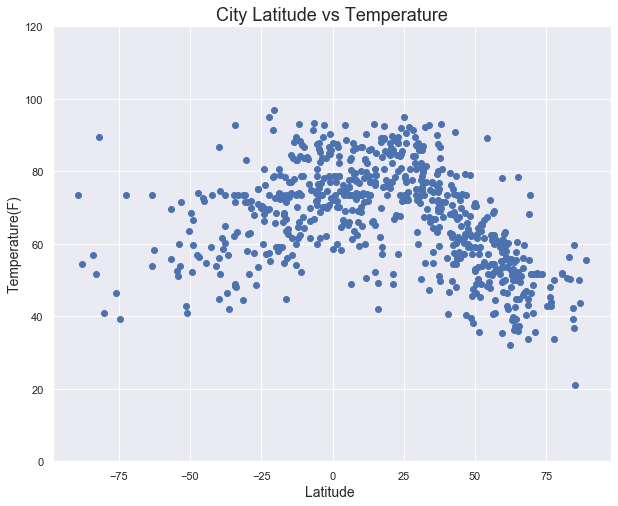

In [7]:
# Build a scatter plot for each data type
sns.set()
plt.figure(figsize=(10,8))
plt.scatter(city_weather['lat'],city_weather['temp'])
plt.title(f"City Latitude vs Temperature", fontsize="18")
plt.xlabel("Latitude ", fontsize="14")
plt.ylabel("Temperature(F)" , fontsize="14")
plt.ylim(0,120)
plt.savefig("Images/Temperature.png")
plt.show()

The latitude vs temperature plot has an unexpected result . As we move north of the equator from a latitude of 0 to a latitude of 80 we can see what appears to be a linear decrease in temperature from 70 degrees Fahrenheit to 20 degrees Fahrenheit and from 20 degrees latititude to 80 degrees latitude

## Latitude vs. Humidity Plot

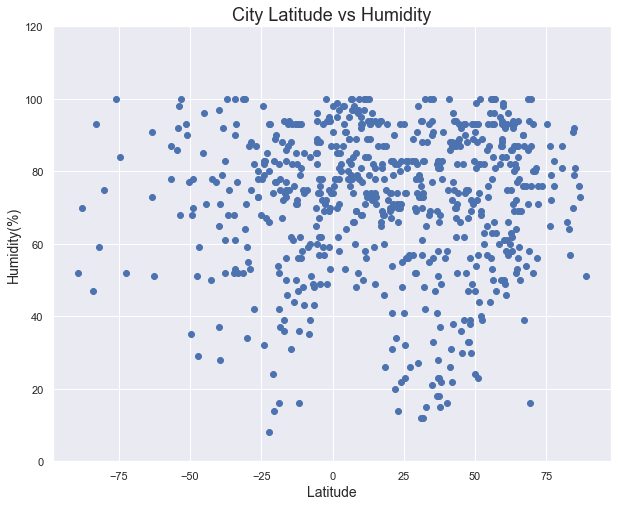

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(city_weather['lat'],city_weather['humidity'])
plt.title(f"City Latitude vs Humidity" , fontsize="18")
plt.xlabel("Latitude" , fontsize="14")
plt.ylabel("Humidity(%)" , fontsize="14")
plt.ylim(0,120)
plt.savefig("Images/Humidity.png")
plt.show()


The Latitude vs. Humidity plot does not seem to have a strong correlation to latitude. One can say however, that it appears more cities have a humidity above 60% than a humidity below 60%

## Latitude vs. Cloudiness Plot

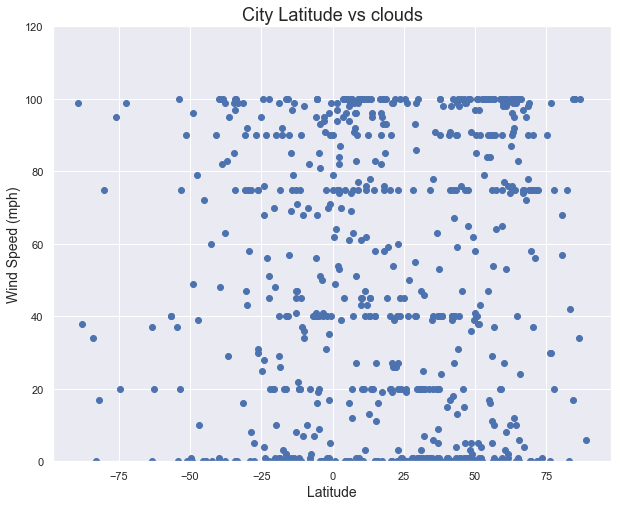

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(city_weather['lat'],city_weather['clouds'])
plt.title(f"City Latitude vs clouds" , fontsize="18")
plt.xlabel("Latitude" , fontsize="14")
plt.ylabel("Wind Speed (mph)" , fontsize="14")
plt.ylim(0,120)
plt.savefig("Images/Wind_Speed.png")
plt.show()

The Latitude vs. Cloudiness plot does not seem to have any correlation to latitude. One can say however, that there seems to be a collection of points across all latitudes at either 0%, 75% or 100% Cloudy.

## Latitude vs. Wind Speed Plot

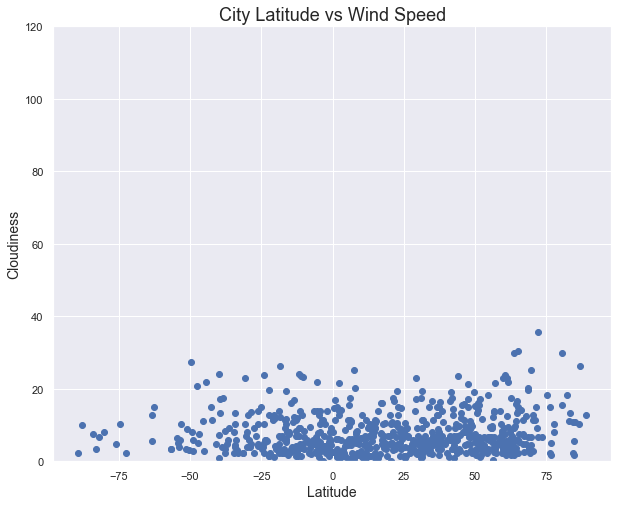

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(city_weather['lat'],city_weather['wind_speed'])
plt.title(f"City Latitude vs Wind Speed" , fontsize="18")
plt.xlabel("Latitude" , fontsize="14")
plt.ylabel("Cloudiness" , fontsize="14")
plt.ylim(0,120)
plt.savefig("Images/Cloudiness.png")
plt.show()

The Latitude vs. Wind Speed scatterplot suggests there is no correlation between Wind Speed and Latitude. One can say that regardless of latitude we see the vast majority of wind speed between 0-20 mph, with most of those falling into the 0-10 mph range.

In [11]:
#Save dataframe
city_weather.to_csv("Output/CityWeatherData.csv",index=False,header=True)

#View the dataframe
city_weather.head()

,city,countries,lat_lngs,lat,long,temp,max_temp,humidity,wind_speed,clouds
0,mataura,PF,"(-84.15719227970935, -158.1656918138079)",-84.157192,-158.1656918138079,57.02,57.02,47,7.67,34
1,heihe,CN,"(50.59119042704734, 126.85828702042306)",50.591190,126.85828702042306,62.6,62.6,88,13.42,40
2,port elizabeth,ZA,"(-89.15485981491796, 34.65092290242765)",-89.154860,34.65092290242765,73.35,73.35,52,2.37,99
3,micheweni,TZ,"(-5.2445735160357, 41.75967388380866)",-5.244574,41.75967388380866,76.39,76.39,74,7.81,19
4,houma,US,"(28.03013570577255, -90.47056875082696)",28.030136,-90.47056875082696,77.52,78.01,83,4.7,1


## Linear Regression

In [12]:
northern_hem = city_weather.loc[city_weather["lat"] >= 0.0]
northern_hem.reset_index(inplace = True)

southern_hem = city_weather.loc[city_weather["lat"] < 0.0]
southern_hem.reset_index(inplace = True)

In [13]:
# Define function for creating linear agression and scatter plot
def linear_agression(xdata,ydata,xlbl,ylbl,lblpos,ifig):  
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata.astype(float), ydata.astype(float))
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(xdata, ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"Output/fig{ifig}.png")
    plt.show()



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6832205535537905


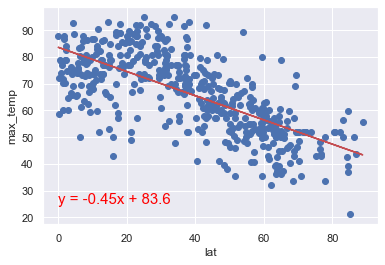

In [14]:
xlbl = "lat"
ylbl = "max_temp"
lblpos = (0,25)
linear_agression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,5)

This scatterplot with linear regression has a r squared value of -0.45 , so there is a strong negative linear relationship between decreasing latitude and decreasing temperature in the Northern Hemisphere . This means 45% of the variance is explained by this linear model

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4715106075913923


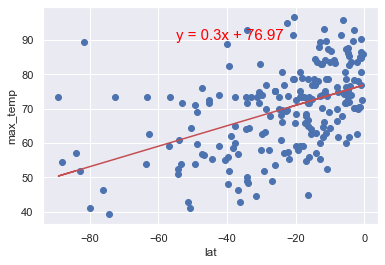

In [15]:
xlbl = "lat"
ylbl = "max_temp"
lblpos = (-55,90)
linear_agression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,6)

This scatter plot shows a weaker relationship between temperature and latitude in the Southern Hemisphere, with an r-squared value of 0.47. This means the linear curve fit can only account for 47% of the variance seen in the data, leaving the majority of the variance unexplained by the equation of the line y = 0.3x + 76.97. Although there seems to be a correlation it is weak at best.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.06150454451193951


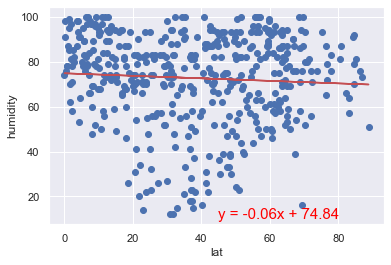

In [16]:
xlbl = "lat"
ylbl = "humidity"
lblpos = (45,10)
linear_agression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,7)

This scatter plot shows a very weak relationship between latitude and humidity in the Northern Hemisphere with an r-squared value of -0.06. Although there seems to be a correlation it is very weak and there is little correlation between latitude and humidity in the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.03568808363209987


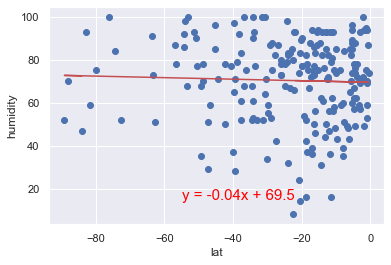

In [17]:
xlbl = "lat"
ylbl = "humidity"
lblpos = (-55,15)
linear_agression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,8)

There is a weak correlation between latitude and humidity in Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016566735561852012


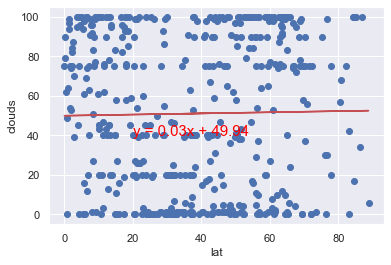

In [18]:
xlbl = "lat"
ylbl = "clouds"
lblpos = (20,40)
linear_agression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,9)

There is a weak correlation between latitude and cloudiness in Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.02745548382858147


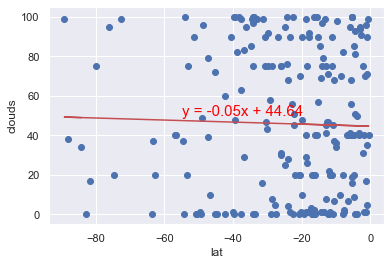

In [19]:
xlbl = "lat"
ylbl = "clouds"
lblpos = (-55,50)
linear_agression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,10)

There is a weak correlation between latitude and cloudiness in Southern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20421139788026169


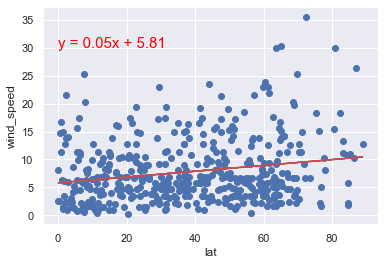

In [20]:
xlbl = "lat"
ylbl = "wind_speed"
lblpos = (0,30)
linear_agression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,11)

There is a weak correlation between wind speed and latitude in Northern Hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.04683788676271324


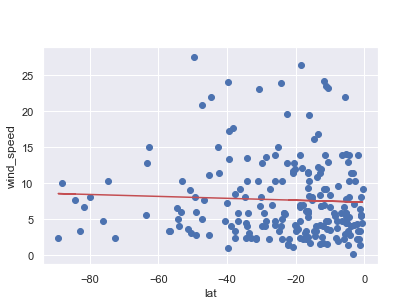

In [21]:
xlbl = "lat"
ylbl = "wind_speed"
lblpos = (-23,33)
linear_agression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,12)

There is a weak correlation between wind speed and latitude in Southern Hemisphere